In [ ]:
import math
from numpy import sin, cos, exp, pi
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# численное интегрирование по промежутку [a, b]
def integrator(function, a, b):
    step = 0.001
    t = np.linspace(a, b, int((b - a) / step))
    return sum([function(i) * step for i in t])

In [ ]:
# вспомогательная функция для обнуления значений меньше допустимой погрешности
def fitter(array):
    for i in range(len(array)):
        if abs(array[i]) < math.e**(-10):
            array[i] = 0
        array[i] = round(array[i], 2)
    return array

In [ ]:
# нахождение k-кого коэффициента разложения в классический ряд Фурье
def find_a_k(function, w_n, dt):
    a_func = lambda t: function(t) * cos(w_n * t)
    a_k = integrator(a_func, dt[0], dt[1])
    if abs(a_k) < math.e**(-10):
        return 0.0
    return a_k

def find_b_k(function, w_n, dt):
    b_func = lambda t: function(t) * sin(w_n * t)
    b_k = integrator(b_func, dt[0], dt[1])
    if abs(b_k) < math.e**(-10):
        return 0.0
    return b_k

In [ ]:
# получение всех коэффицентов разложения в классический (по косинусам и синусам) ряд Фурье
def get_coeffs_real(function, T, dt, n):
    a_coeffs = [2 / T * find_a_k(function, 2 * pi * k/T, dt) for k in range(0, n)]
    # a_coeffs[0] /= 2
    b_coeffs = [2 / T * find_b_k(function, 2 * pi * k/T, dt) for k in range(0, n)]
    a_coeffs = fitter(a_coeffs)
    b_coeffs = fitter(b_coeffs)
    return a_coeffs, b_coeffs

In [ ]:
# разложение функции в ряд Фурье по косинусам и синусам
def create_fourier_classical(function, T, dt, n):
    a_coeffs, b_coeffs = get_coeffs_real(function, T, dt, n)
    a_coeffs[0] /= 2
    approx = lambda t: sum([a_coeffs[i] * cos(2 * pi * i * t/T) + b_coeffs[i] * sin(2 * pi * i * t/T) for i in range(n)] )
    return approx

In [ ]:
# проверка выполнения равенства Парсеваля для разложенной в ряд Фурье по косинусам и синусам функции
def check_Parseval_equation_real(function, T, dt, a_ks, b_ks):
    a, b = dt[0], dt[1]
    function_squared = lambda t: function(t)**2
    function_norm = 2/T * integrator(function_squared, a, b)
    coeff_norm = a_ks[0] ** 2 / 2
    for i in range(1, len(a_ks)):
        coeff_norm += (a_ks[i]**2 + b_ks[i]**2)
    return function_norm, coeff_norm


In [ ]:
# Функция, сохраняющая построенные графики разложения в Фурье ряд синусам и косинусам
def save_Fn(original_function, N):
    fig, ax = plt.subplots()
    x = np.linspace(1, 10, 100)
    y_1 = [original_function(i) for i in  x]
    fourier_approx = create_fourier_classical(original_function, 4, [-2, 2], N)
    y_2 = [fourier_approx(x[i]) for i in range(len(x))]
    ax.plot(x, y_1, label='original')
    ax.plot(x, y_2, label='F_n = ' + str(N))
    ax.grid(True)
    ax.legend()
    plt.savefig('F_' + str(N) + '_classical.jpg')

In [ ]:
# исходная функция, которую будем раскладывать в ряд Фурье
def original_function(t):
  return t + t**3 + 2**t

In [ ]:
# нахождение k-кого коэффициента разложения в экспоненциальный ряд Фурье
def find_c_k(function, w_n, dt):
    return 1/T * integrator(lambda t: function(t) * exp(-1j * w_n * t), dt[0], dt[1])

In [ ]:
# функция для получения всех коэффициентов экспоненциального ряда Фурье

def get_c_k(function, T, dt, n):
    w_n = (2 * pi)/T
    c_coeffs_pos = [0 for i in range(0, n)] # исключительно ненулевые коэффициенты
    for i in range(0, n):
        c_i = find_c_k(function, w_n * i, dt)
        c_coeffs_pos[i] = c_i
    return c_coeffs_pos


In [ ]:
# разложение функции в экспоненциальный ряд Фурье
def create_fourier_exponential(function, T, dt, n):
    c_coeffs_pos = get_c_k(function, T, dt, n)
    w_n = (2 * pi)/T
    # при составлении аппроксимации учитываем, что  c_coeffs_pos содержит только ненулевые коэффициенты ряда
    return lambda t: c_coeffs_pos[0] + sum([c_coeffs_pos[i] * exp(1j * i * w_n * t) + np.conj(c_coeffs_pos[i]) * exp(-1j * i * w_n * t) for i in range(1, n)])

In [ ]:
def check_Parseval_exponential(function, T, dt, c_k):
    a, b = dt[0], dt[1]
    parseval_func_help = lambda t: np.conjugate(function(t)) * function(t)
    left_part =  1/T * integrator(parseval_func_help, a, b)#sum([function(i) * np.conjugate(function(i)) * step for i in t])
    right_part = sum([np.abs(c_k[i])**2 for i in range(len(c_k))])
    return left_part, right_part


In [ ]:
T = 4 # рассматриваемый период
dt = [-2, 2] # промежуток интегрирования
N =30

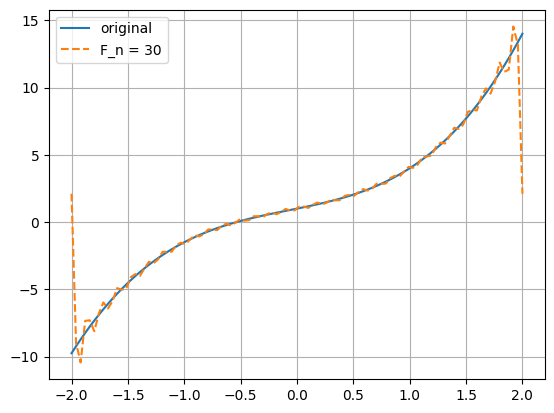

Левая и правая части равенства Парсеваля: (55.07709791760689, 53.05685)


In [ ]:
fig, ax = plt.subplots()
x_1 = np.linspace(dt[0], dt[1], 100)
y = [original_function(i) for i in x_1]
a_ks, b_ks = get_coeffs_real(original_function, T, dt, N)
approx = create_fourier_classical(original_function, T, dt, N)
y_approx =  [approx(p) for p in x_1]
ax.plot(x_1, y, label='original')
ax.plot(x_1, y_approx, '--', label='F_n = ' + str(N))
plt.grid(True)
plt.legend()
plt.show()

print(f"Левая и правая части равенства Парсеваля: {check_Parseval_equation_real(original_function, T, dt, a_ks, b_ks)}")

In [ ]:
print(a_ks)
print(b_ks)

[2.71, -0.44, 0.13, -0.06, 0.03, -0.02, 0.02, -0.01, 0.01, -0.01, 0.01, -0.01, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0]
[0, 4.27, -3.36, 2.4, -1.84, 1.48, -1.24, 1.07, -0.94, 0.84, -0.75, 0.68, -0.63, 0.58, -0.54, 0.5, -0.47, 0.44, -0.42, 0.4, -0.38, 0.36, -0.34, 0.33, -0.31, 0.3, -0.29, 0.28, -0.27, 0.26, -0.25, 0.24, -0.24, 0.23, -0.22, 0.22, -0.21, 0.2, -0.2, 0.19, -0.19, 0.18, -0.18, 0.18, -0.17, 0.17, -0.16, 0.16, -0.16, 0.15]


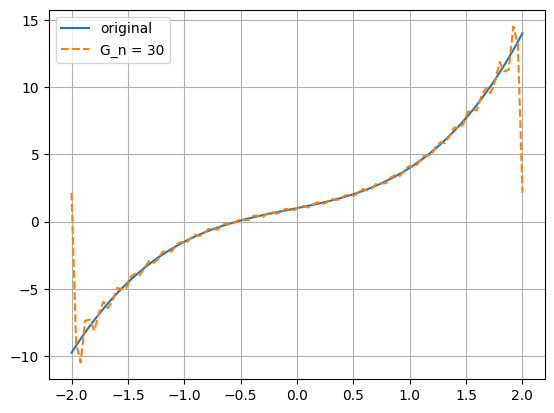

Левая и правая части равенства Парсеваля: (27.538548958803446, 26.529431027972915)


In [ ]:
fig, ax = plt.subplots()
x = np.linspace(dt[0], dt[1], 100)
y_1 = [original_function(i) for i in x_1]
fourier_approx = create_fourier_exponential(original_function, T, dt, N)
c_ks = get_c_k(original_function, T, dt, N)
for i in range(1, N):
    c_ks.append(np.conj(c_ks[i]))

y_2 = [np.real(fourier_approx(x_1[i])) for i in range(len(x))] # учитываем лишь вещественную часть - мнимая равна 0 для вещественных функций
ax.plot(x, y_1, label='original')
ax.plot(x, y_2, '--', label='G_n = ' + str(N))
ax.grid(True)
ax.legend()
plt.show()

print(f"Левая и правая части равенства Парсеваля: {check_Parseval_exponential(original_function, T, dt, c_ks)}")
None

In [ ]:
print(c_ks)

[(1.352719773348863+0j), (-0.22091637080690096-2.1340479212801187j), (0.06330033039954927+1.682180992084557j), (-0.029167140712718576-1.198125522563824j), (0.01678959713933327+0.918766936566424j), (-0.010981847135381499-0.7424892983283209j), (0.007805804557962084+0.6221259343654381j), (-0.005883474182483261-0.5349999461035451j), (0.004632864320793216+0.46911783218406883j), (-0.0037741074658288023-0.4175981941481349j), (0.003159172242568533+0.3762270705669693j), (-0.0027038287304093182-0.34228557977962937j), (0.002357296868119388+0.3139432821862196j), (-0.0020874904732420163-0.2899237633281343j), (0.0018733306315278386+0.26931028457979567j), (-0.0017005078966907147-0.2514276969074587j), (0.0015590322428460875+0.23576792117915152j), (-0.0014417582262434224-0.22194136277693294j), (0.0013434657804256033+0.20964432429043206j), (-0.0012602697150069803-0.19863659864394334j), (0.0011892301565478505+0.18872572029831725j), (-0.0011280894307956956-0.1797556777965706j), (0.0010750905750453428+0.17